# Evaluar el rendimiento en algoritmos de clasificación/regresión: Matriz de confusión
En el campo de la inteligencia artificial  y el aprendizaje automático una matriz de confusión es una herramienta que permite visualizar el desempeño o rendimiento de un algoritmo de aprendizaje supervisado (algoritmos de clasificación sobre todo y en algún caso de regresión). 
<br>
### Terminología en español
Estas métricas también tienen su correspondiente nombre en español, pero es importante que sepas su nombre en inglés porque muchas librerías (scikit-learn), las tienen ya implementadas. En esta tabla puedes encontrar la correspondencia.

| Inglés | Español
| --- | --- |
| Precision | Precisión
| Recall | Exhaustividad
| F1-score | Valor-F o Medida F
| Accuracy | Exactitud
| Confusion Matrix | Matriz de Confusión
| True Positive | Positivos Verdaderos
| True Negative | Negativos Verdaderos
| False Positive | Positivos Falsos
| False Negative | Negativos Falsos

### Que es la matriz de confusión
La matriz de confusión es un método de evaluación de rendimiento de un modelo de clasificación (a veces se usa en regresión)

La matriz compara los valores reales con los predichos por el modelo de aprendizaje. Esto nos ayuda a ver que tan bien está funcionando nuestro modelo

Así se ve de forma general
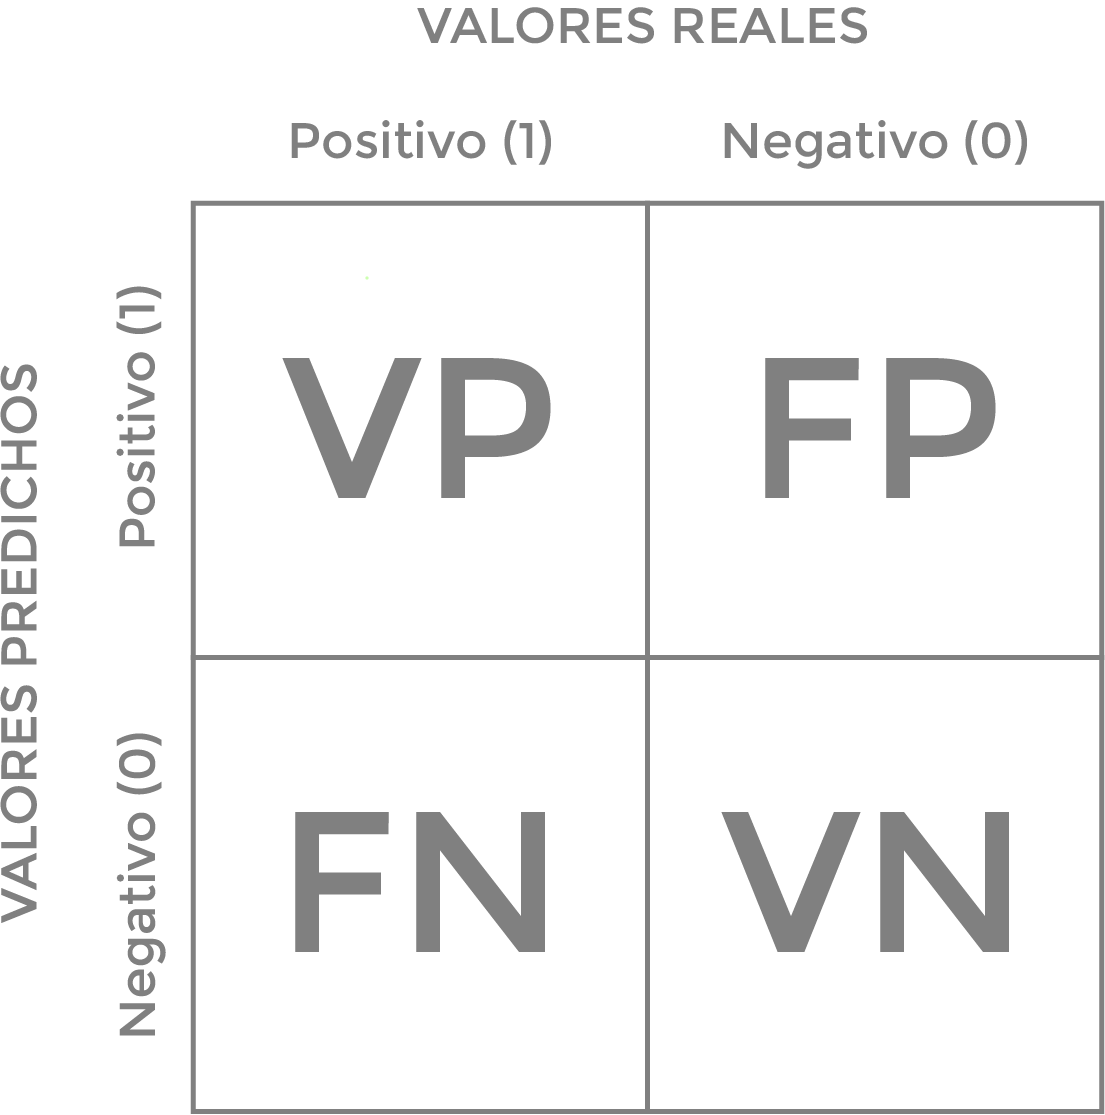

* La variable de destino tiene dos valores: __positivo__ o __negativo__
* Las __columnas__ representan los __valores reales__ de la variable objetivo.
* Las __filas__ representan los __valores predichos__ de la variable objetivo.

### Destripando la matriz de confusión con un ejemplo
¿Qué es eso de TP, FP, FN y TN?
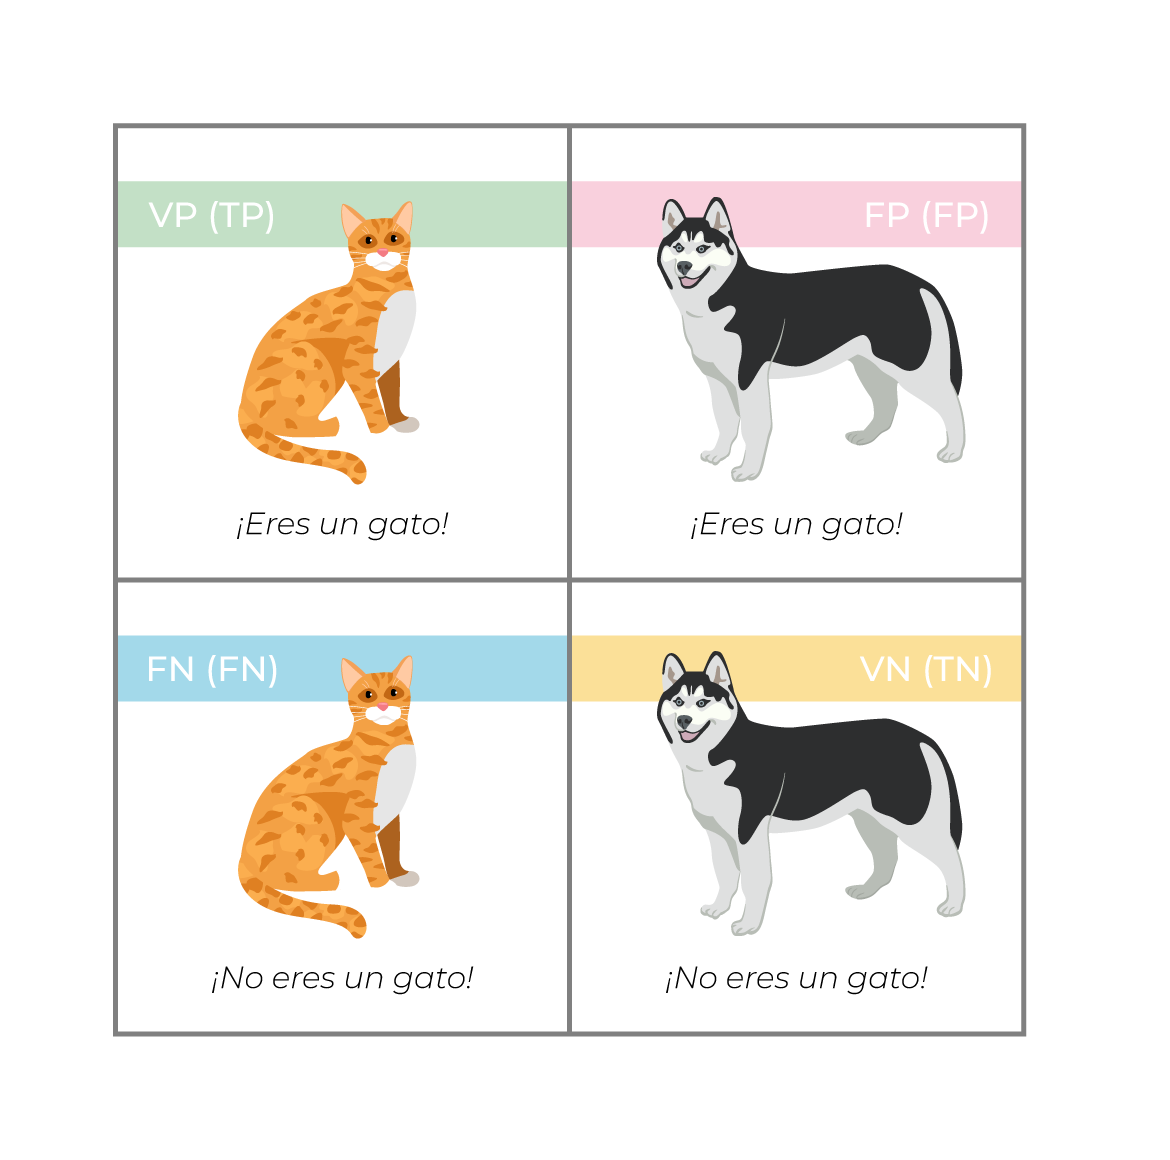
* __Verdadero Positivo (VP) o (TP: True Positive)__
    * El valor predicho coincide con el valor real
    * El valor real fue positivo y el modelo predijo un valor positivo
* __Verdadero Negativo (VN) o (TN: True Negative)__
    * El valor predicho coincide con el valor real
    * El valor real fue negativo y el modelo predijo un valor negativo
* __Falso Positivo (FP) o (FP: False Positive): error de tipo 1__
    * El valor predicho fue predicho falsamente
    * El valor real fue negativo pero el modelo predijo un valor positivo
    * También conocido como error tipo 1
* __Falso Negativo (FN) o (FN: False Negative): error de tipo 2__
    * El valor predicho fue predicho falsamente
    * El valor real fue positivo pero el modelo predijo un valor negativo
    * También conocido como error tipo 2

En resumen:
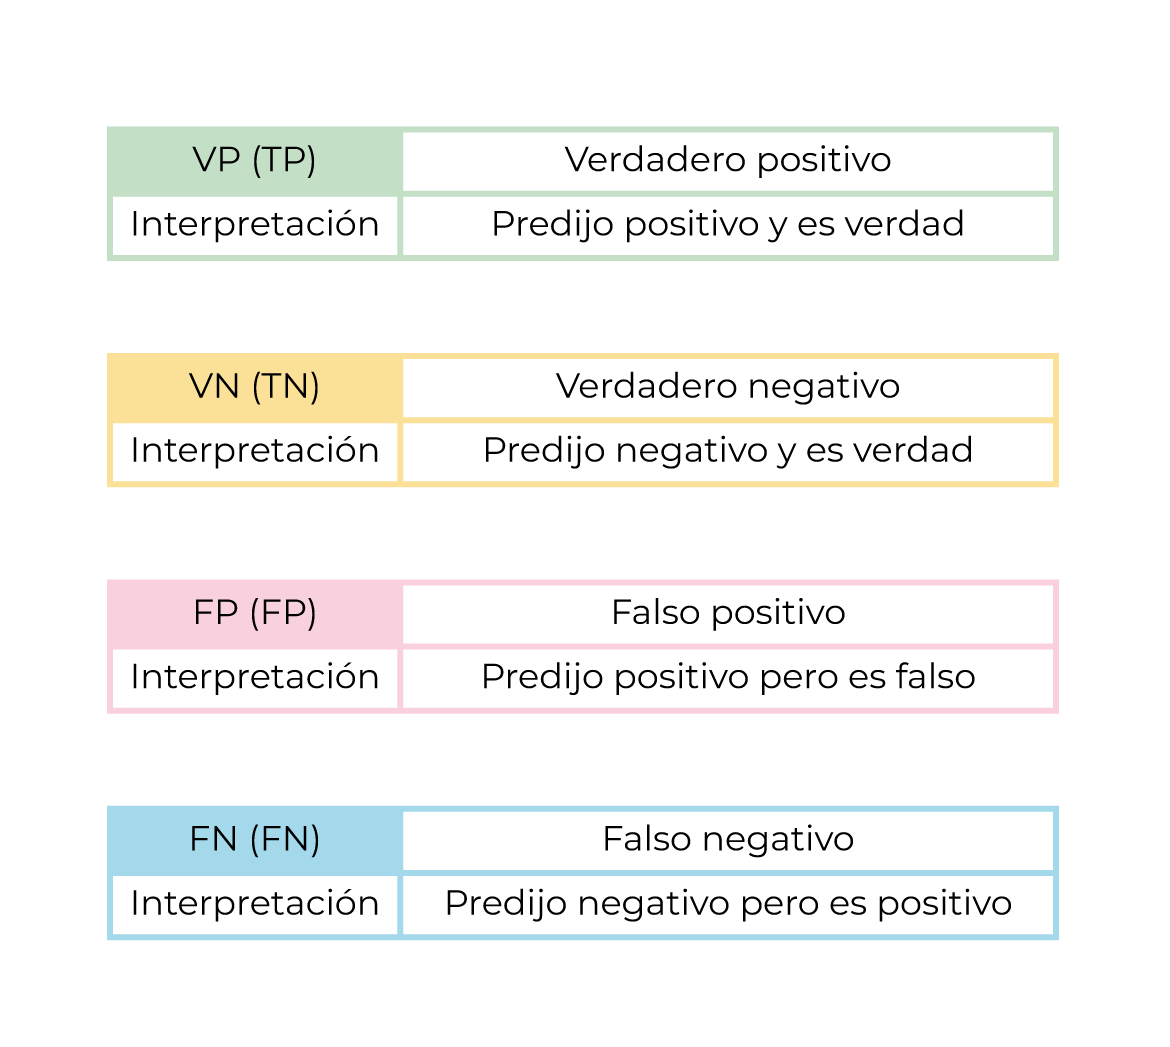
<div class="alert alert-success">
<b>Truco</b> para recordar fácilmente la matriz de confusión:<br><br>
    <li><b>Positivo (Positive) o Negativo (Negative)</b>: se refiere a la predicción. Si el modelo predice 1 entonces será positivo, y si predice 0 será negativo.</li>
    <li><b>Verdadero (True) o Falso (False)</b>: se refiere si la predicción es correcta o no.</li>
</div>

#### Apliquemos lo anterior al ejemplo de los perros y los gatos

* Verdadero Positivo (VP) : El modelo dijo que era un gato y efectivamente era un gato 😄 (buena predicción)
* Falso Positivo (FP): Predijo que era un gato cuando en realidad era un perro ☹️ (mala predicción)
* Falso Negativo (FN) Predijo que no era un gato cuando en realidad si lo era ☹️ (mala predicción)
* Verdadero Negativo (VN): el modelo dijo que no era un gato y efectivamente no lo era 😄 (buena predicción)

### Métricas de la matriz de confusión ¿ Para que sirven? 
Básicamente las métricas nos sirven para evaluar mejor la matriz. Y minimizar los falsos negativos vs los falsos positivos y aplicaremos cada una dependiendo del caso.
 
Las metricas son:

* Recall o exhaustividad
* Presicion o precisión 
* Accuracy o exactitud
* F1-Score o Medida F

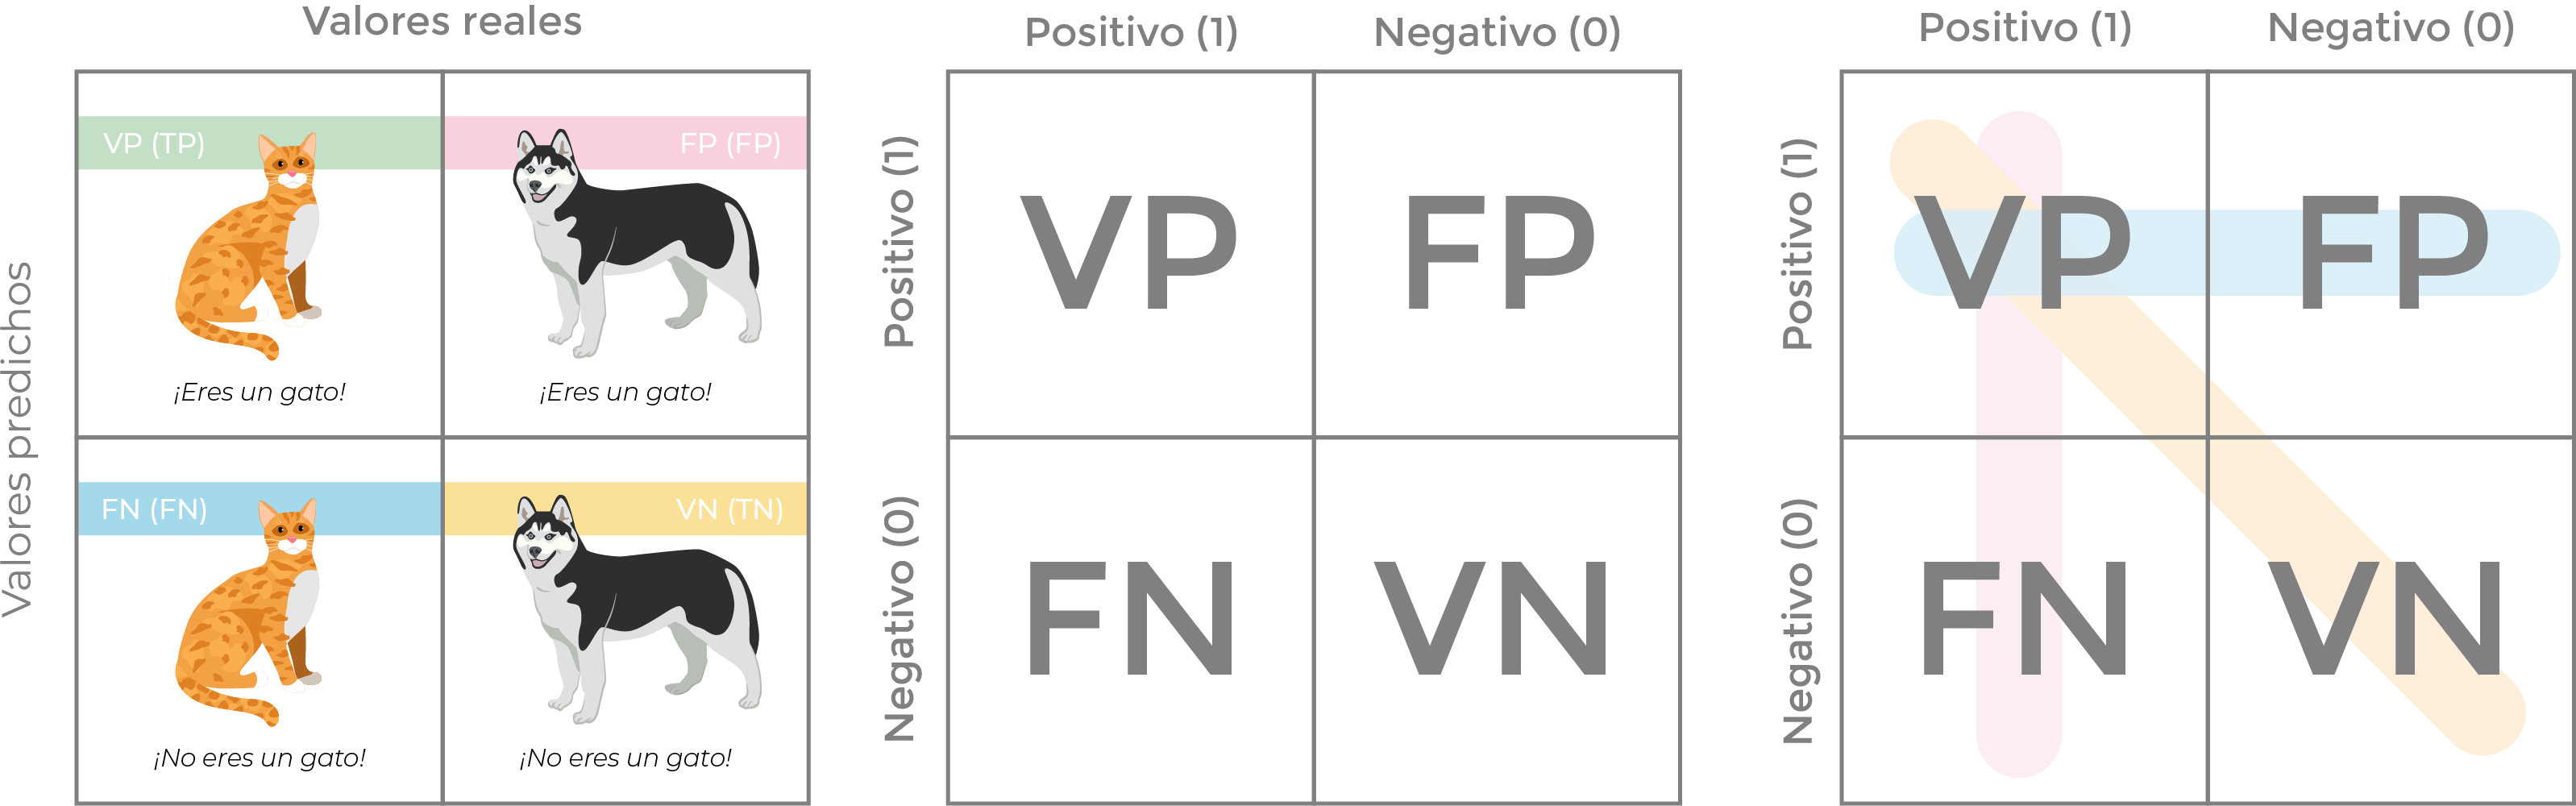

### Calculemos y analicemos las métricas con un ejemplo
* Caracteristicas:
    * 1: Gato
    * 0: No Gato o lo que es lo mismo, Perro

* Datos del ejemplo
    * Real ......... [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
    * Predicho ..    [1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0]

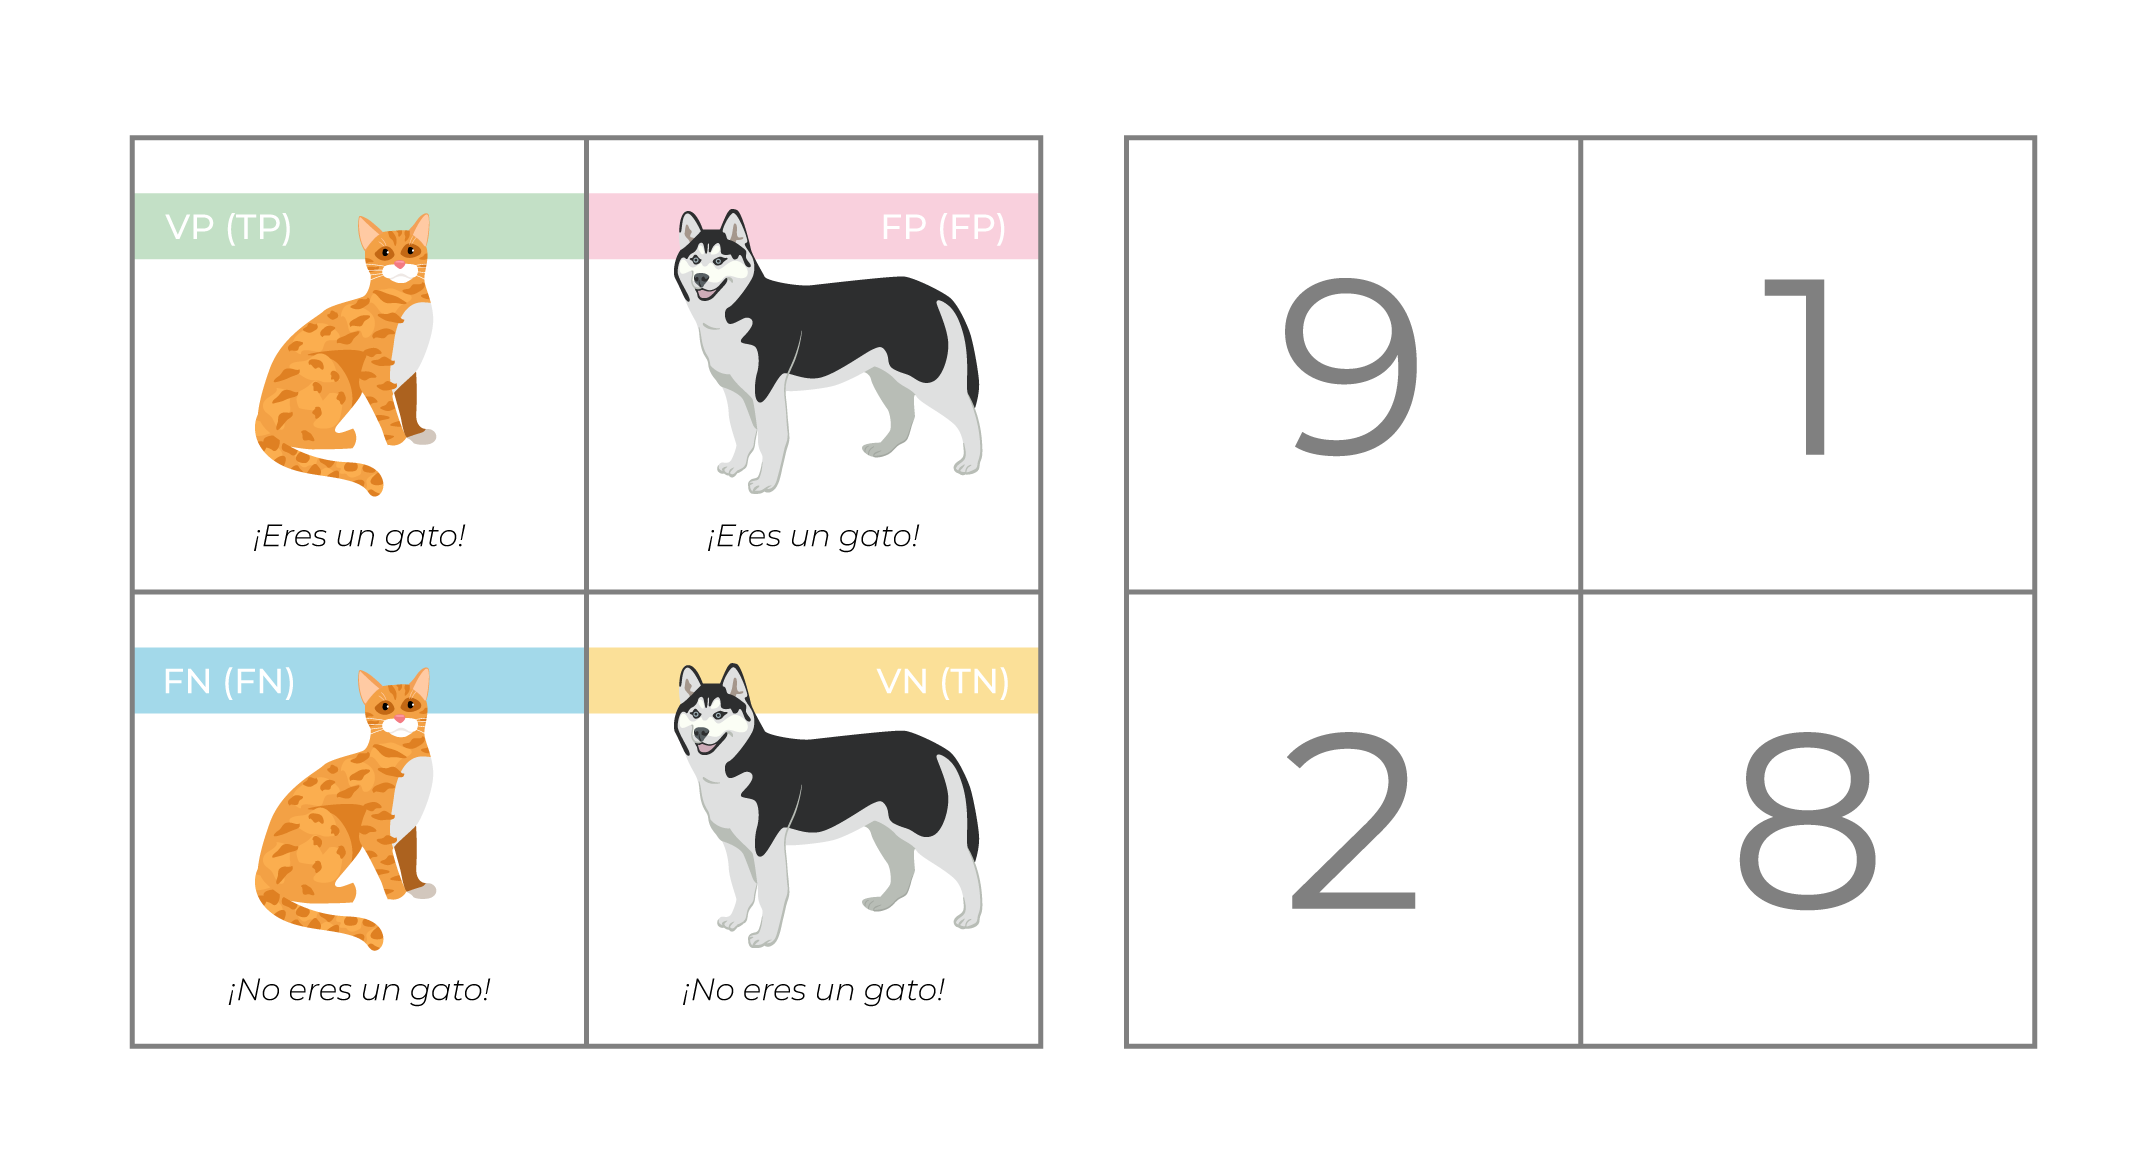
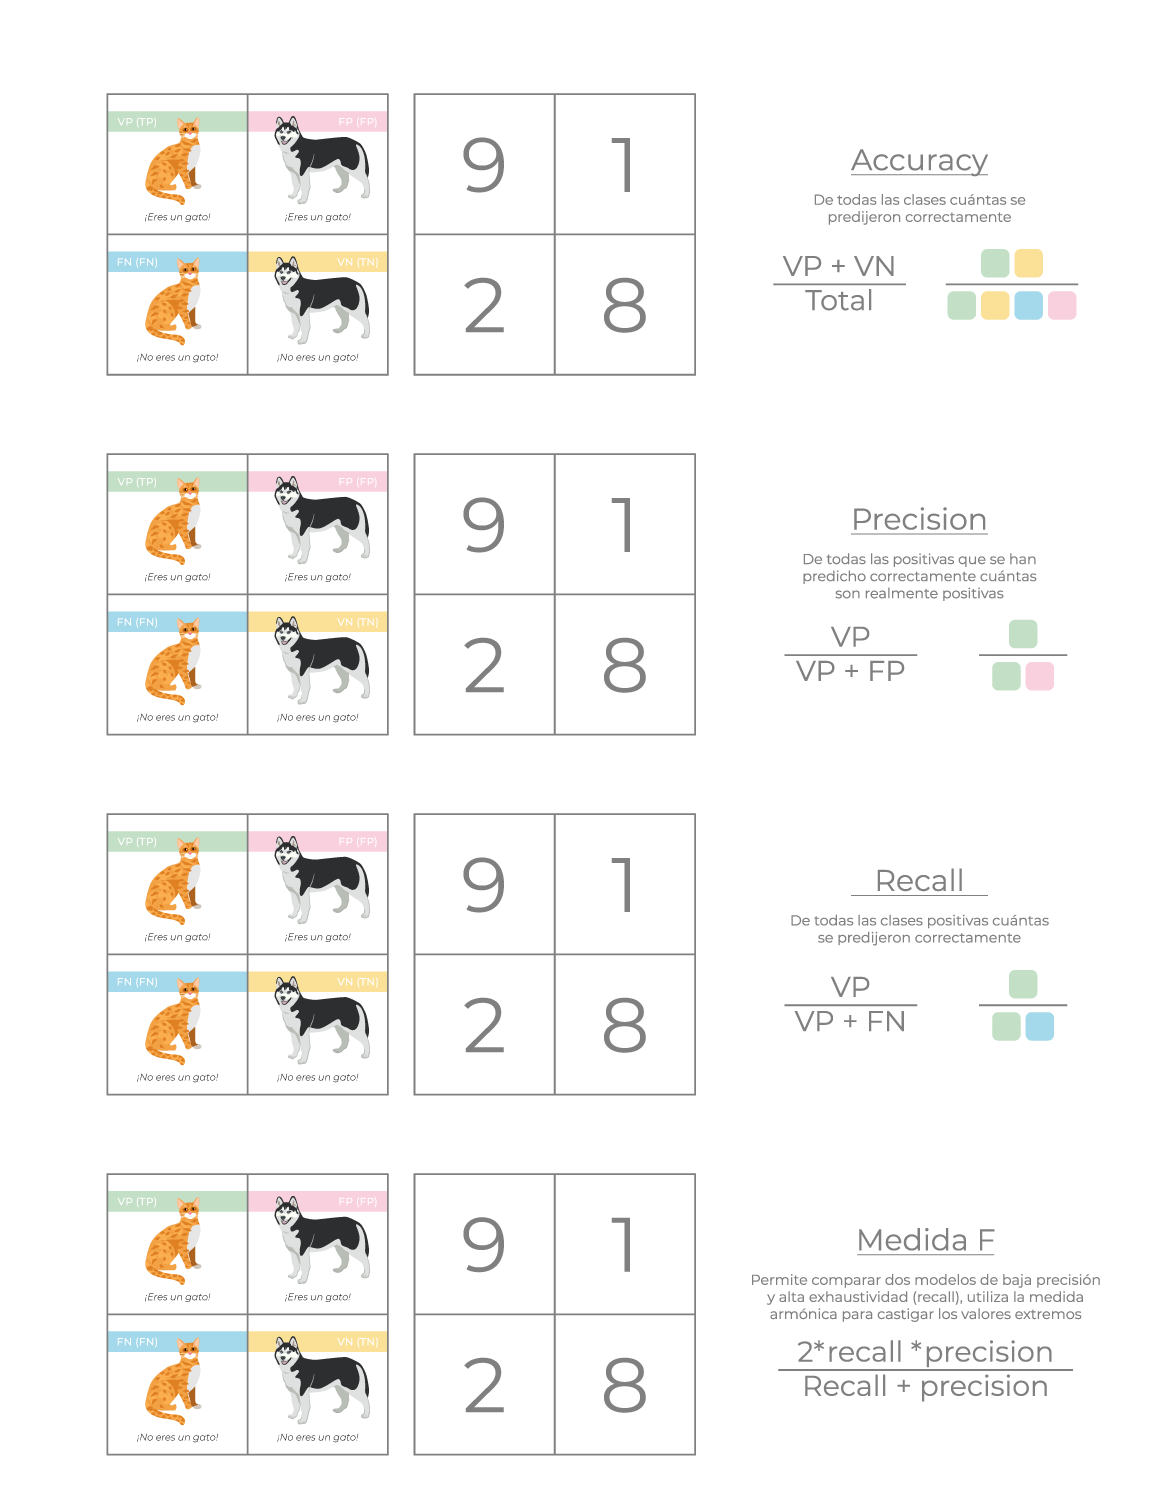

<div class="alert alert-danger">
<b>CUIDADO:</b> La matriz de confusión que hemos visto hasta ahora, es la clásica (la teórica), pero scikit learn nos mostrará otras dos opciones, veamos las diferencias:
</div>

<div>
<br>
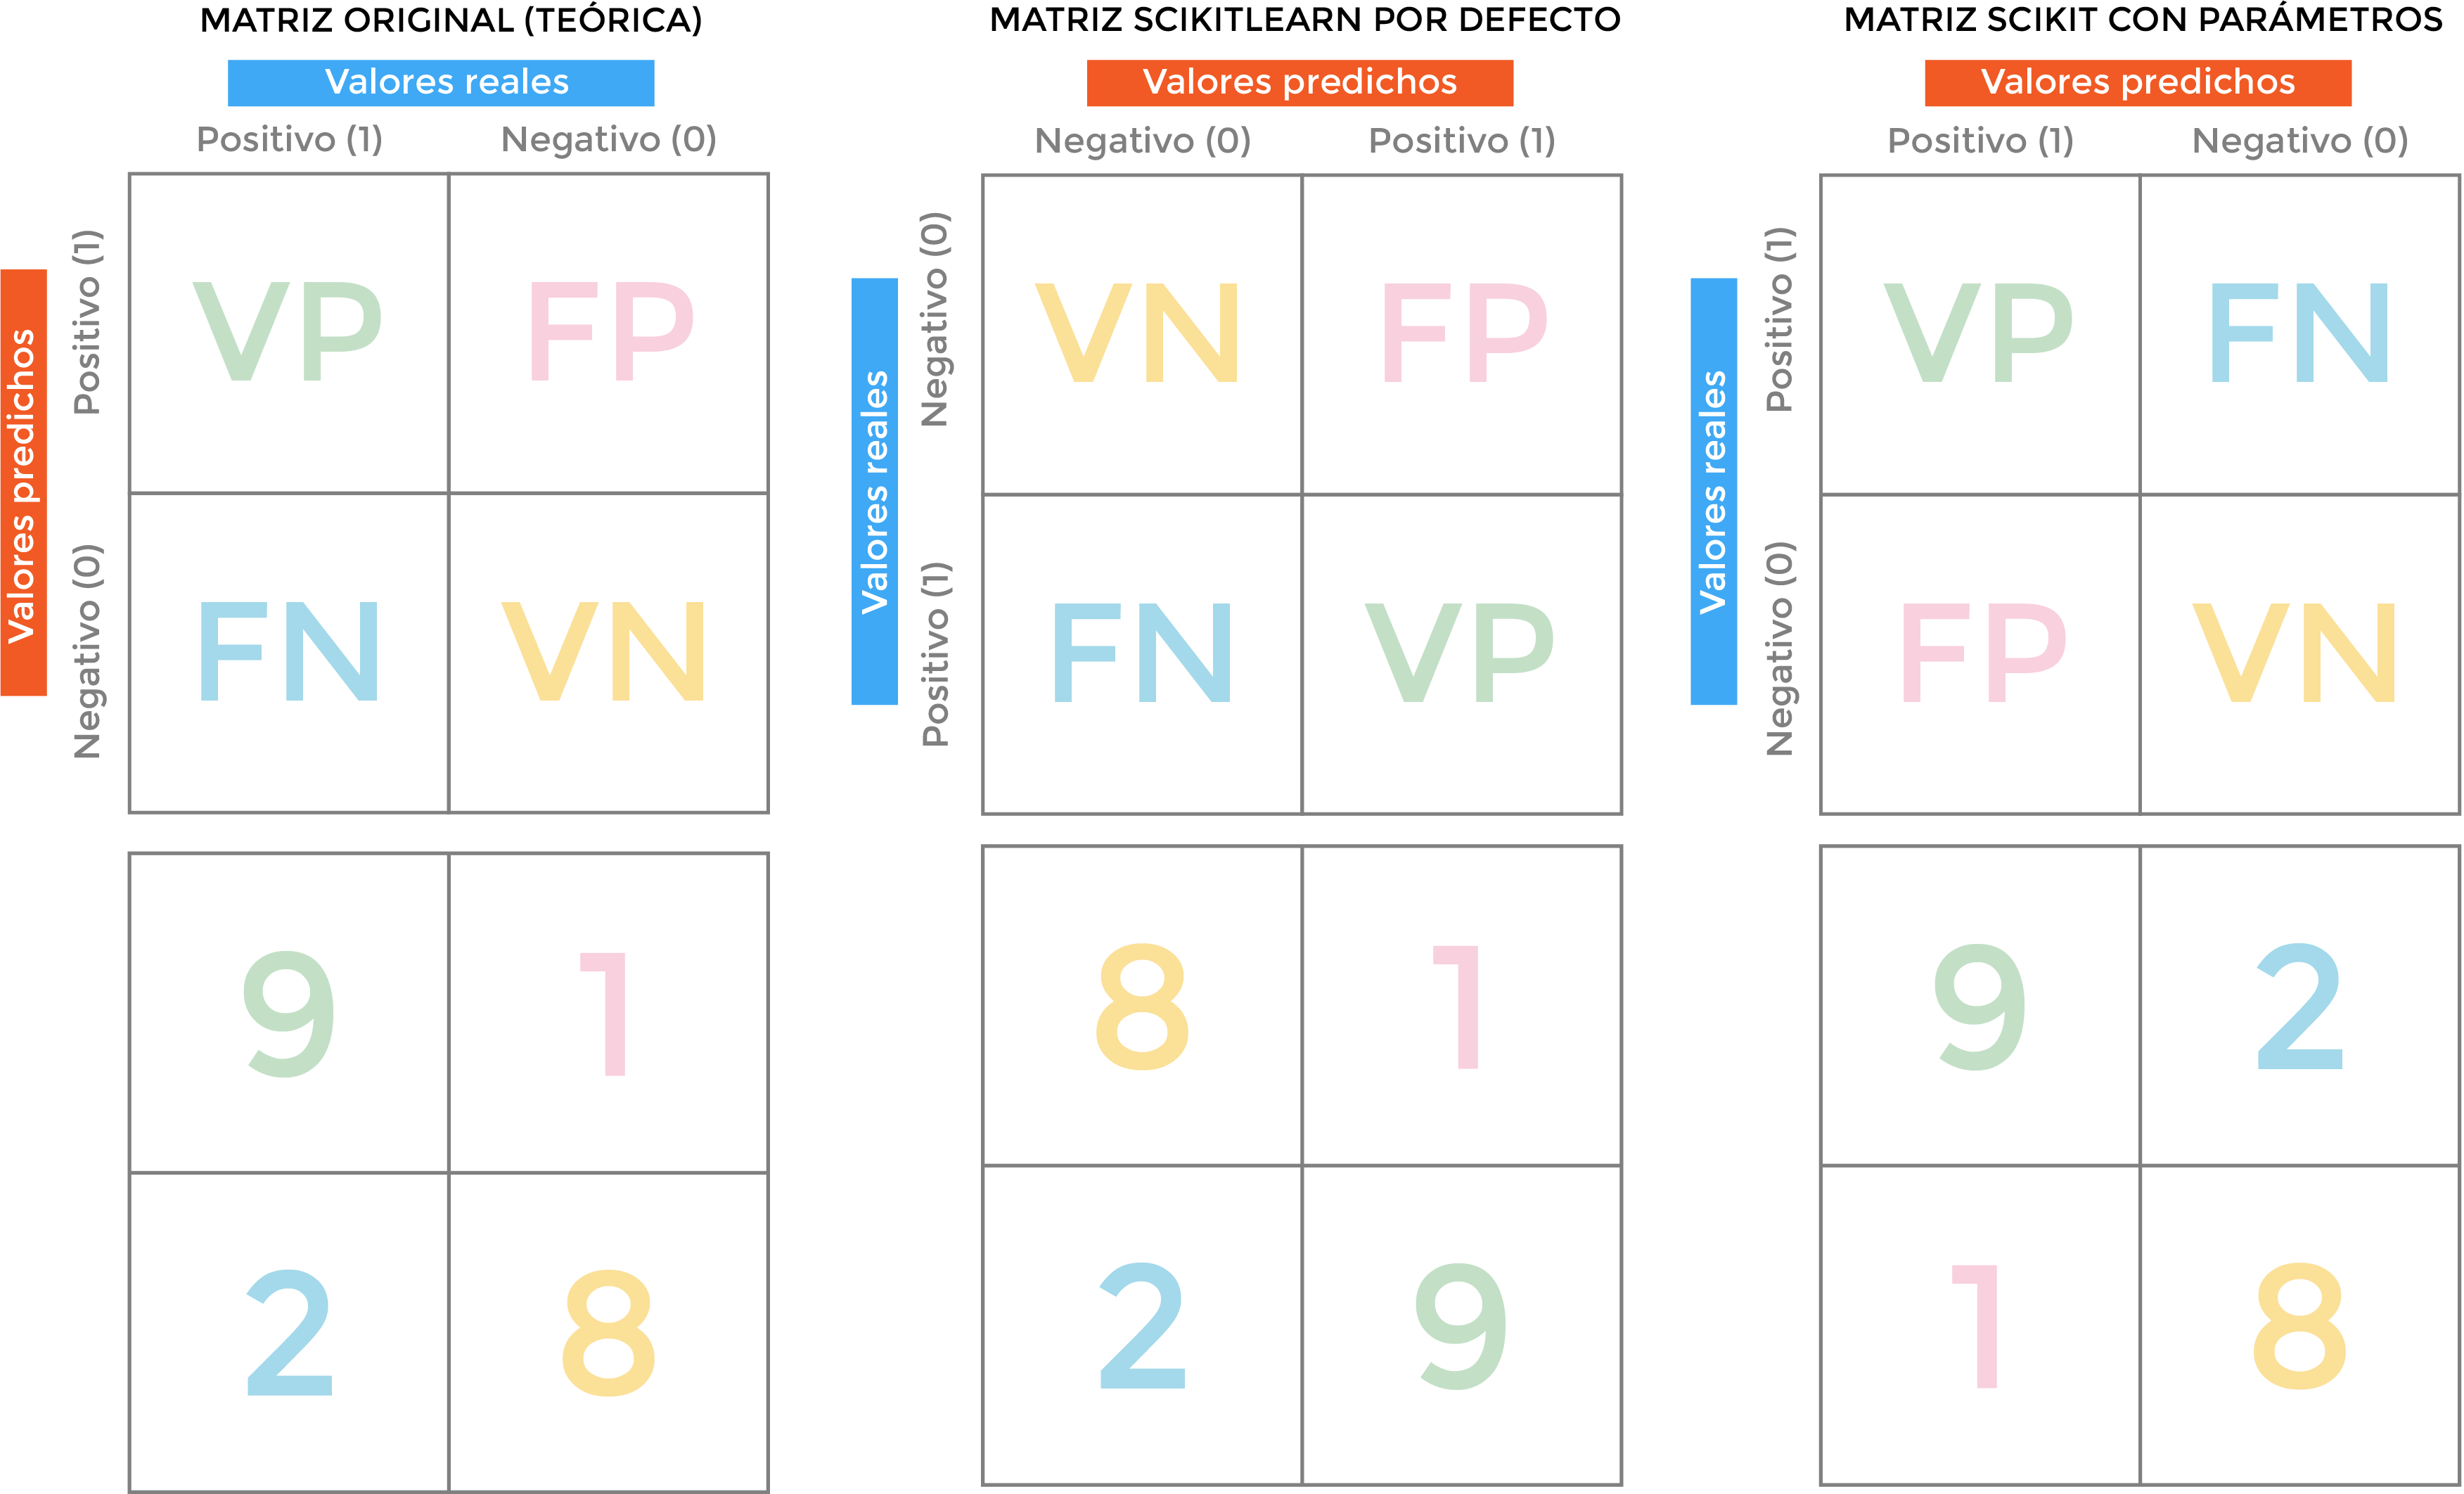
</div>
    
### Pasemos esto a código

In [2]:
from sklearn.metrics import confusion_matrix, classification_report

real =     [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
predicho = [1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0] 

ModuleNotFoundError: No module named 'sklearn'

#### Ejecutemos a la matriz de confusión por defecto

In [4]:
matriz = confusion_matrix(real, predicho, labels=[0,1])
print("Matriz de confusión:\n", matriz)

Matriz de confusión:
 [[8 1]
 [2 9]]


#### Ejecutemos a la matriz de confusión con los parámetros en un orden concreto
En este caso hemos decidido que lo que queremos predecir son los gatos (1)

In [5]:
matriz = confusion_matrix(real, predicho, labels=[1,0])
print("Matriz de confusión:\n", matriz)

Matriz de confusión:
 [[9 2]
 [1 8]]


In [2]:
vp, fn, fp, vn = confusion_matrix(real, predicho, labels=[1,0]).reshape(-1)
print("Verdadero Positivo (VP o TP):", vp) # Predijo positivo y es verdad: 9 
print("Verdadero Negativo (VN o TN):", vn) # Predijo negativo y es verdad: 8
print("Falso Positivo (FP):", fp) # Predijo positivo pero es falso: 2
print("Falso Negativo (FN):", fn) # Predijo negativo pero es positivo: 1

Verdadero Positivo (VP o TP): 9
Verdadero Negativo (VN o TN): 8
Falso Positivo (FP): 1
Falso Negativo (FN): 2


In [2]:
accuracy = (vp + vn) / (vp + vn + fp + fn)
precision = vp / (vp + fp)
recall = vp / (vp + fn)
f1 = (2 * recall * precision) / (recall + precision)
print("Accuracy o exactitud:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall o exhaustividad:", round(recall,2))
print("F1-Score o Medida F:", round(f1,2))

Accuracy o exactitud: 0.85
Precision: 0.9
Recall o exhaustividad: 0.82
F1-Score o Medida F: 0.86


In [3]:
report = classification_report(real, predicho)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.90      0.82      0.86        11

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



### ¿Por qué necesitamos una matriz de confusión?
Vamos a explicar esto con el ejemplo de los perros y los gatos. 

De forma simple __queremos saber si un modelo logra predecir si el animal que le estoy mostrando es un gato o un perro__ (los dos valores para nuestra variable objetivo serían: Gato y No Gato)

Ahora, debemos preguntarnos: __¿Por qué necesitamos una matriz de confusión cuando tenemos simplemente la accuracy (de todas las clases cuantas se predijeron correctamente)?__ Bueno, veamos dónde falla esto.

Digamos que tenemos los siguientes datos y hacemos calculos:

* TP o VP: 30
* TN o VN: 930
* FP: 30 
* FN: 10

$$Accuracy = \frac{30 + 930}{30 + 30 + 930 + 10} = 0.96$$

Nos da como resultado un 96% de accuracy, esto a priori puede parecer un resultado excelente .... pero no lo es ... Analicemos todas las métricas.

In [5]:
vp = 30
vn = 930
fp = 30 
fn = 10

accuracy = (vp + vn) / (vp + vn + fp + fn)
precision = vp / (vp + fp)
recall = vp / (vp + fn)
f1 = (2 * recall * precision) / (recall + precision)
print("Precision:", round(precision,2))
print("Recall o exhaustividad:", round(recall,2))
print("F1-Score o Medida F:", round(f1,2))
print("Accuracy o exactitud:", round(accuracy,2))

Precision: 0.5
Recall o exhaustividad: 0.75
F1-Score o Medida F: 0.6
Accuracy o exactitud: 0.96


#### Precision (Precisión)
Con la métrica de precisión podemos medir la __calidad__ del modelo de machine learning en tareas de clasificación. Nos dice cuántos de los casos predichos correctamente resultaron realmente positivos. En el ejemplo, la precisión es la respuesta a la pregunta __¿qué porcentaje hay de gatos?__
$$Precision = \frac{VP}{VP + FP} = \frac{30}{30 + 30} = 0.5$$

#### Recall (Exhaustividad)
La métrica de exhaustividad nos va a informar sobre la __cantidad__ que el modelo de machine learning es capaz de identificar. En el ejemplo, la exhaustividad (recall) es la respuesta a la pregunta __¿qué porcentaje de los gatos somos capaces de identificar?__ Es decir, nos dice cuántos de los casos positivos reales pudimos predecir correctamente con nuestro modelo.
$$Recall = \frac{VP}{VP + FN} = \frac{30}{30 + 10} = 0.75$$

El 50% de los casos predichos correctamente resultaron ser casos positivos. Mientras que nuestro modelo predijo con éxito el 75% de los positivos. ¿Ves la diferencia?

<div class="alert alert-success">
<b>La precisión es una métrica útil en los casos en los que los falsos positivos son una preocupación mayor que los falsos negativos.</b>
</div>

<div class="alert alert-success">
<b>El recall es una métrica útil en los casos en que el falso negativo triunfa sobre el falso positivo.</b>
</div>

Pero habrá casos en los que no haya una distinción clara entre si la precisión es más importante o el recall. ¿Qué debemos hacer en esos casos? ¡Los combinamos y entra en juego F1-Score o Medida F!

#### F1-Score (Medida F)
El valor F1 se utiliza para __combinar las medidas de precision y recall en un sólo valor__. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

F1 se calcula haciendo la media armónica entre la precisión y la exhaustividad:

$$F1 = 2 * \frac{precision * recall}{precision + recall} = 2 * \frac{0.5 * 0.75}{0.5 + 0.75} = 0.6$$

El valor F1 asume que nos importa de igual forma la precisión y la exhaustividad. Esto no tiene que ser así en todos los problemas. Por ejemplo, cuando necesitamos predecir si hay riesgo de que un trozo de basura espacial se choque con un satélite, podemos valorar más la exhaustividad (% de choques que somos capaces a detectar) a riesgo de tener una peor precisión.

#### Accuracy (Exactitud)
La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado. Esta es una de las métricas más usadas y favoritas … que te recomiendo evitar! El problema con la exactitud es que nos puede llevar al engaño, es decir, puede hacer que un modelo malo (como el del ejemplo) parezca que es mucho mejor de lo que es.

El accuracy (exactitud) se calcula con la siguiente fórmula:

$$accuracy = \frac{VP + VN}{VP + VN + FP + FN} = \frac{30 + 930}{30 + 930 + 30 + 10} = 0.96$$

Es decir, según esta metrica el modelo acierta el 96% de las veces. Como ves, la exactitud es una métrica muy engañosa. De hecho, si tuviésemos un modelo que siempre predijera a los gatos como perros (pasamos los 30 de VP a que se conviertan en falsos negativos en FN), __¡su accuracy sería del 93% a pesar de no haber predicho correctamente ningun gato!__.

* VP = 0
* VN = 930
* FP = 30 
* FN = 40

$$accuracy = \frac{VP + VN}{VP + VN + FP + FN} = \frac{0 + 930}{0 + 930 + 30 + 40} = 0.93$$

<div class="alert alert-danger">
<b>CUIDADO</b>: La métrica accuracy (exactitud) no funciona bien cuando las clases están desbalanceadas como es en este caso. <b>La mayoría de los animales no son gatos, así que es muy fácil acertar diciendo que es un perro</b>. Para problemas con clases desbalanceadas es mucho mejor usar precision, recall y F1. Estas métricas dan una mejor idea de la calidad del modelo.
</div>

### Más herramientas de evaluación de nuestro modelo
Hemos visto diferentes herramientas para evaluar nuestro modelo (la última la veremos más adelante):
* __Matriz de confusión__ (confusion_matrix)
* __Reporte de clasificación__ (classification_report)
* __Métricas__ (accuracy, precision, recall, f1-score)
* __Curva ROC (área AUC)__

### ¿Qué es la curva ROC?
En Machine Learning, la medición del rendimiento es una tarea esencial. Entonces, cuando se trata de un problema de clasificación, podemos contar con una curva AUC-ROC. Esta es una de las métricas de evaluación más importante para verificar el rendimiento de cualquier modelo de clasificación.

Una __curva ROC (curva de característica operativa del recepto)__ es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
* __Tasa de verdaderos positivos (TPR)__: es sinónimo de exhaustividad y, por lo tanto, se define de la siguiente manera:
$$TPR = \frac{VP}{VP + FN}$$
* __Tasa de falsos positivos (FPR)__ se define de la siguiente manera:
$$FPR = \frac{FP}{FP + VN}$$

Una curva ROC representa TPR frente a FPR en diferentes umbrales de clasificación. Reducir el umbral de clasificación clasifica más elementos como positivos, por lo que aumentarán tanto los falsos positivos como los verdaderos positivos. En la siguiente figura, se muestra una curva ROC típica.
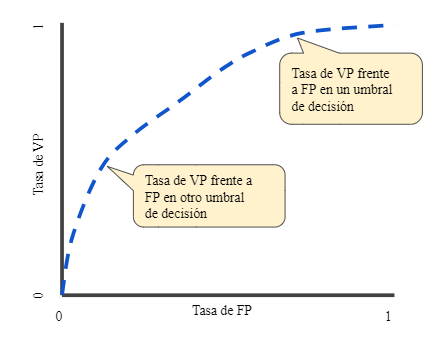

### ¿Qué es la curva AUC?

AUC significa "área bajo la curva ROC". Esto significa que el __AUC mide toda el área bidimensional por debajo de la curva ROC__ completa.

Un modelo cuyas predicciones son un 100% incorrectas tiene un AUC de 0.0; otro cuyas predicciones son un 100% correctas tiene un AUC de 1.0.
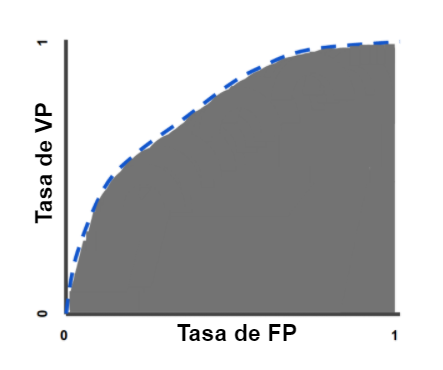

El modelo obtuvo un AUC (en base a la curva ROC) de: 0.8535353535353535


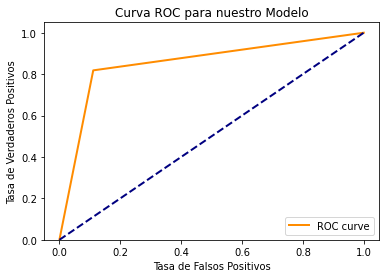

In [4]:
# Curva ROC 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

print("El modelo obtuvo un AUC (en base a la curva ROC) de:", roc_auc_score(real, predicho))

fpr, tpr, _ = roc_curve(real, predicho)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC para nuestro Modelo")
plt.legend(loc="lower right")
plt.show()